<a href="https://colab.research.google.com/github/seungmindavid/Machine-Learning-2023/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) - Classification

- SVM: Find the classifier that mamizes the margin.
- Margin ($\mathcal{p}$): distance between the separator (hyperplane) and support vectors. And the margin is $\mathcal{p} = \frac{2}{||w||}$
- Classifier: $f(x) = sign(w^Tx + b)$
- Distance from any point to margin: $r(x) = \frac{y(w^Tx+b)}{||w||}$

- Goal: Find w and b such that
1. $\mathcal{p} = \frac{2}{||w||}$ is maximized
2. And for all $(x^{(i)}, y^{(i)}): y^{(i)}(w^Tx^{(i)} + b) \geq 1$

- Formulation:

  $\min_{w,b}w^Tw$

  s.t. $(w^Tx^{(i)}+b)y^{(i)} \geq 1, \forall i$



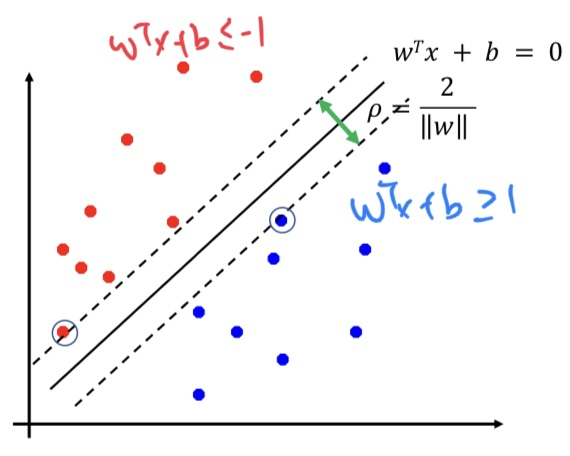

## Soft margin approach

- What if data is not linearly separable?: Allow "error" in classification

- Formulation:

  $min_{w,b,\{\xi^{i}\}}w^Tw + C∑_i \xi^{(i)}$

  s.t. $(w^Tx^{(i)} + b)y^{(i)} \geq 1-\xi^{(i)}, \forall i$
  
  $\xi^{(i)} \geq 0, \forall i$

Problems:
- It's Quadratic Programming




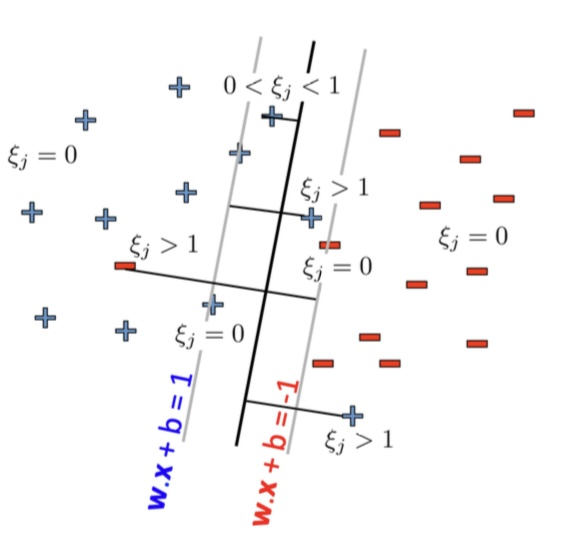

## Lagrange Dual Function 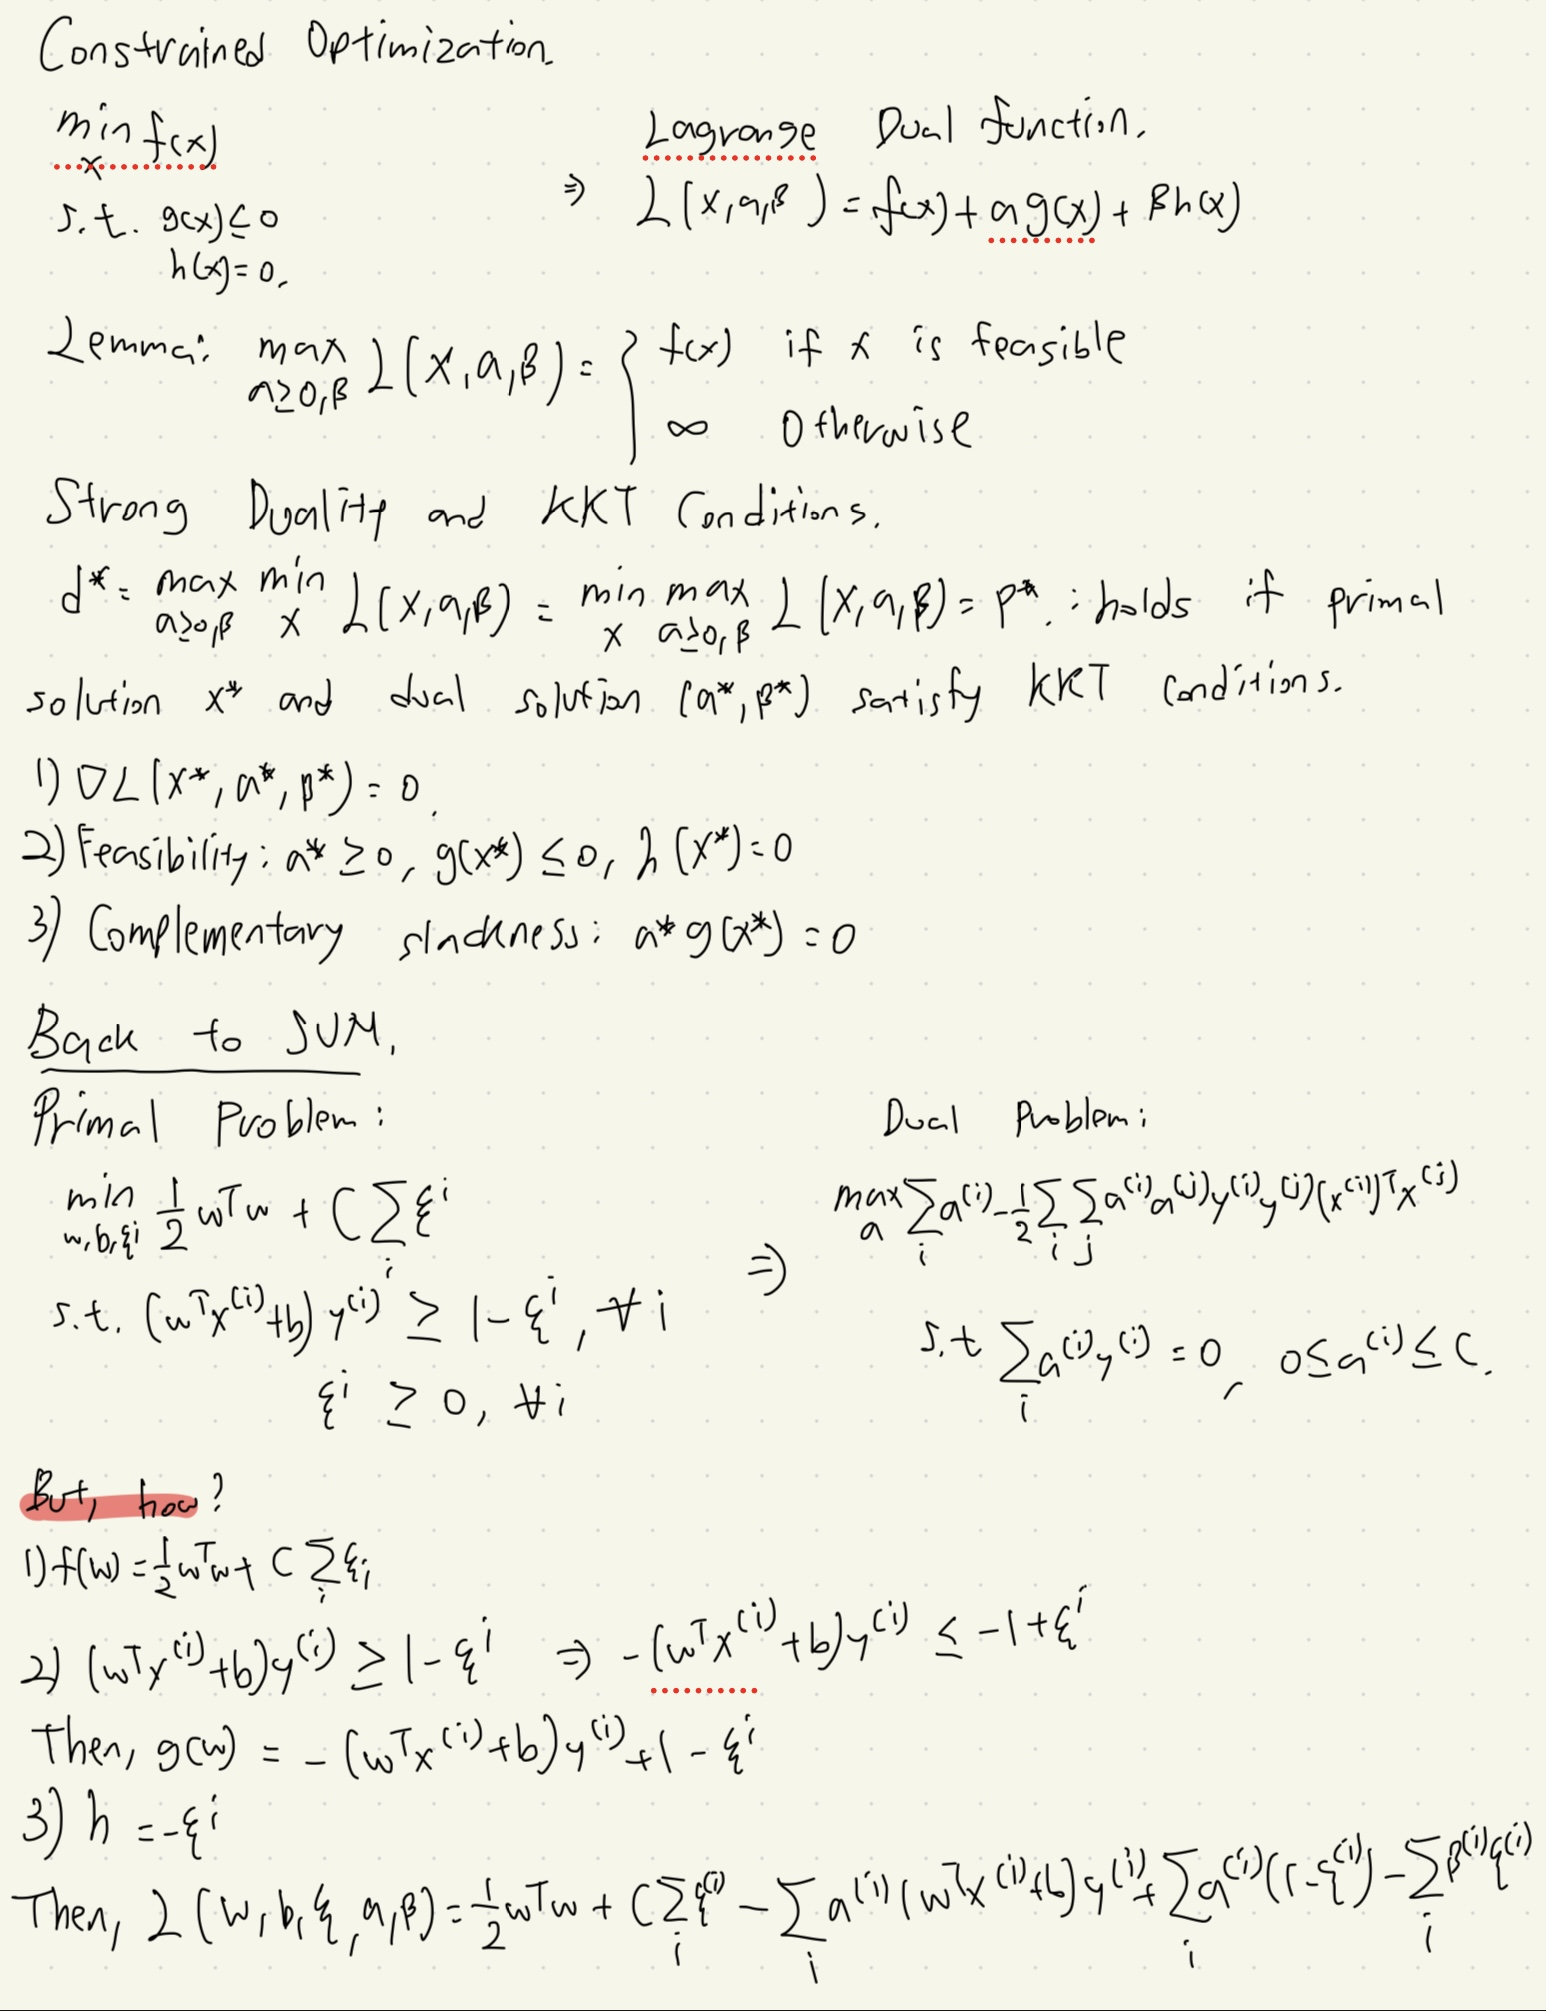



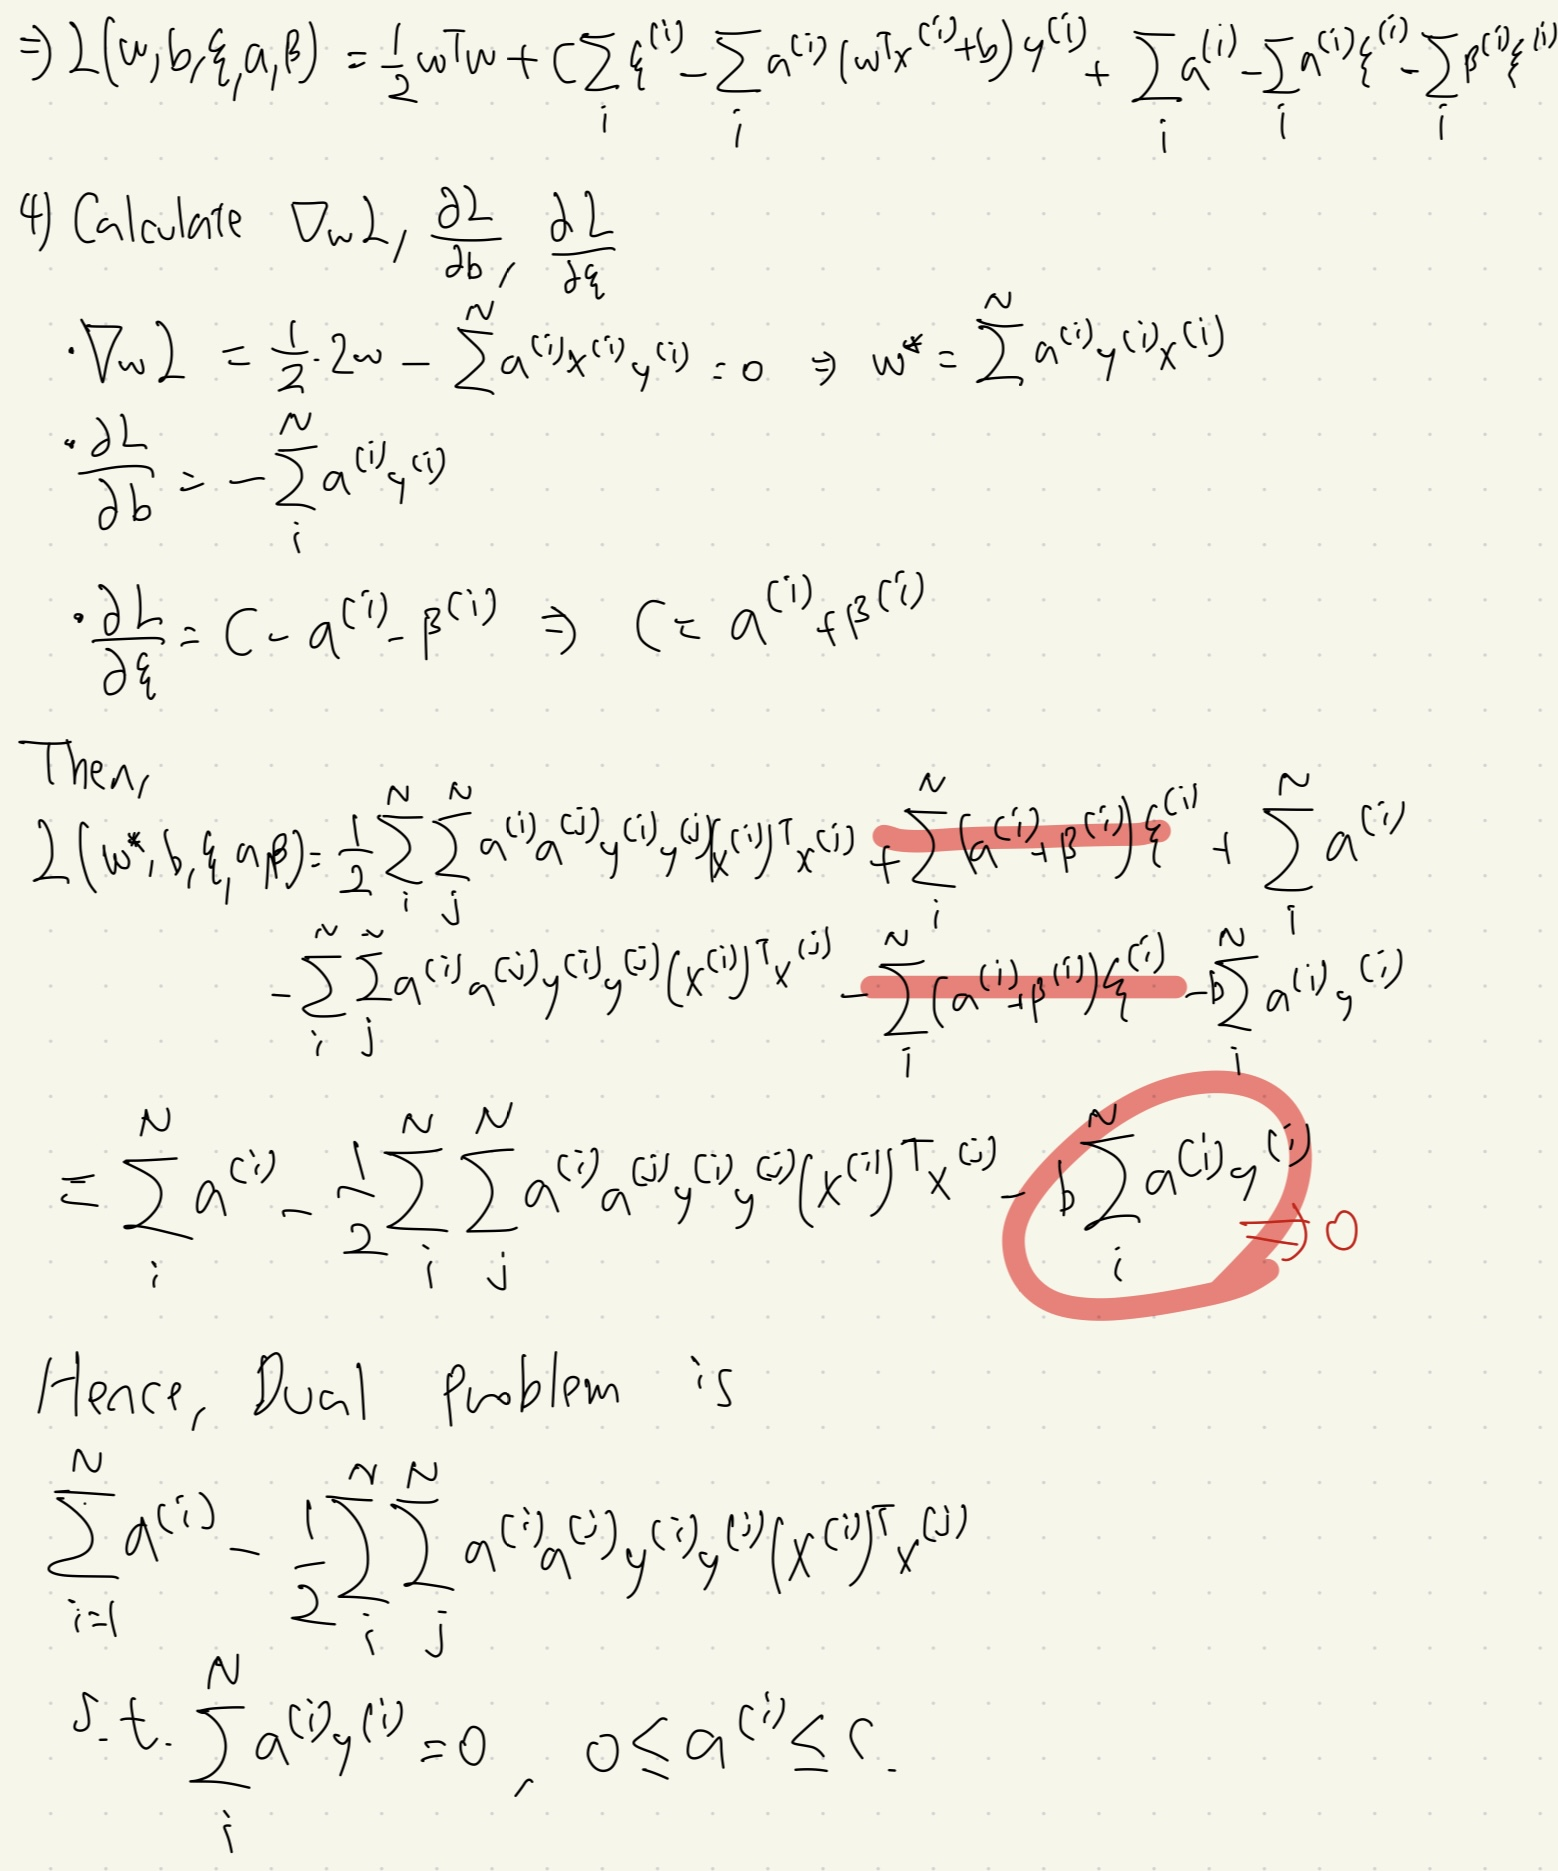

## SVM Linearly Separable Case

- Primal problem:

  $\min_{w,b,\{\xi^{(i)}\}} \frac{1}{2}w^Tw + C∑_i\xi^{(i)}$

  s.t. $(w^Tx^{(i)}+b)y^{(i)} \geq 1-\xi^{(i)}, \forall i$

  and, $\xi^{(i)} \geq 0, \forall i$

- Primal version of classifier: $f(x) = sign(w^Tx + b)$

- Dual problem: $max_a ∑_i a^{(i)} -\frac{1}{2}∑_i\sum_j a^{(i)} a^{(j)} y^{(i)} y^{(j)} (x^{(i)})^Tx^{(j)}$

  s.t. $\sum_i a^{(i)} y^{(i)} = 0, 0 \leq a^{(i)} \leq C$

- Dual version of classifier: $f(x) = sign(∑_i a^{(i)} y^{(i)} (x^Tx^{(i)}) + b)$


## Kernel Trick
- Polynomial of degree 2 for one-dimensional input $x \in \mathbb{R}: \phi(x) = [1,x,x^2]$
- Polynomial of degree 2 for two-dimensional input $x \in \mathbb{R^2}: \phi(x) = [1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$
- Polynomial of degree 3 for two-dimensional input $x \in \mathbb{R^2}: [1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_2^3, x_1^2x_2, x_2^2x_1]$
- Number of terms for polynomial of degree d for m-dimensional input: $\frac{(d+m-1)!}{d!(m-1)!}$ ~ $m^d$
- Dual problem:

$max_a ∑_i a^{(i)} -\frac{1}{2}∑_i\sum_j a^{(i)} a^{(j)} y^{(i)} y^{(j)} \phi(x^{(i)})^T \phi x^{(j)}$

  s.t. $\sum_i a^{(i)} y^{(i)} = 0, 0 \leq a^{(i)} \leq C$

- Kernel version:

$max_a ∑_i a^{(i)} -\frac{1}{2}∑_i\sum_j a^{(i)} a^{(j)} y^{(i)} y^{(j)} k(x^{(i)},x^{(j)})$

  s.t. $\sum_i a^{(i)} y^{(i)} = 0, 0 \leq a^{(i)} \leq C, k(x^{(i)},x^{(j)}) = \phi(x^{(i)})^T \phi x^{(j)}$

- Hence, as long as we can calculate $k(x^{(i)},x^{(j)})$ efficiently, we don't need to explicitly calculate the high-dimensional inner product.
- For polynomials of degree d we can write: $k(u,v) = (u^Tv + 1)^d$
- Gaussian Kernel: $k(u,v) = exp(-\frac{||u-v||^2}{2\sigma^2})$

Finally, Kernel SVM classifier:
$f(x) = sign(\sum_i a^{(i)} y^{(i)} k(x, x^{(i)}))$

In [1]:
%config Completer.use_jedi = False
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm

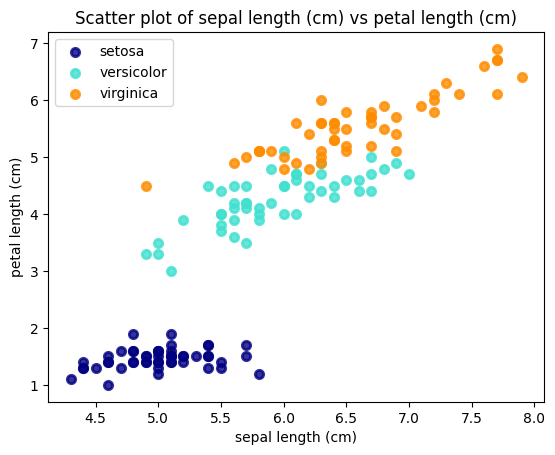

In [12]:
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Extract the first two features (sepal length and sepal width)
feature1 = 0  # Sepal length
feature2 = 2  # Sepal width

# Create a scatter plot
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, feature1], X[y == i, feature2], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(f'Scatter plot of {data.feature_names[feature1]} vs {data.feature_names[feature2]}')
plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])

plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X[y!=2],y[y!=2],test_size=.2)

Train with sklearn SVM

In [16]:
# Instantiate Classifier
clf = SVC(kernel='linear')
# Fit classifier to data
clf.fit(X_train,y_train) # Solving a QP!
y_pred = clf.predict(X_test) # Make prediction on test data
print(accuracy_score(y_test,y_pred)) # Report test accuracy

1.0


In [17]:
w=clf.coef_.squeeze()
b=clf.intercept_
alpha=clf.dual_coef_ # This is alpha*y
sv=clf.support_vectors_
margin=1./np.sqrt((w**2).sum())

<ipython-input-19-ba56a733c981>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(XX, YY, Z, cmap=cm.get_cmap('RdBu'),


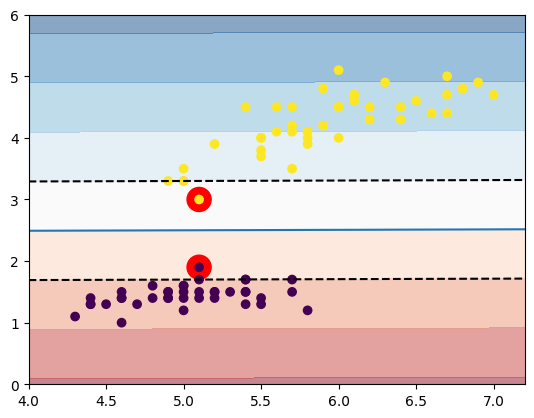

In [19]:
xx = np.linspace(4, 7.2,100)
yy = -(w[0]/w[1])*xx-b/w[1]
yy_down = yy - margin
yy_up = yy + margin

ygrid = np.linspace(0,6,100)
xgrid = xx
YY, XX = np.meshgrid(ygrid, xgrid)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Put the result into a contour plot
plt.contourf(XX, YY, Z, cmap=cm.get_cmap('RdBu'),
             alpha=0.5, linestyles=['-'])
# Plot support vectors
plt.scatter(sv[:,0],sv[:,1],c='r',s=300*abs(alpha))
# Plot data
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
# Plot decision boundary
plt.plot(xx,yy)
# Plot lower margin
plt.plot(xx,yy_down,'k--')
# Plot upper margin
plt.plot(xx,yy_up,'k--')
# plt.xticks(())
# plt.yticks(())